<a href="https://colab.research.google.com/github/DaniilAszn/Sci-tech_methods_course/blob/main/Dimensionless_complexes_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Методы научно-технического прогнозирования

Тема работы: Анализ набора данных легковых автомобилей с помощью методов теории безразмерных комплексов

## Этап 1: Данные (значения в системе СИ).

In [ ]:
import math as m
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
%matplotlib inline
plt.style.use('ggplot')

In [ ]:
np.random.seed(0)
data = {
    'Длина, м': np.random.uniform(3, 5, 225),
    'Ширина, м': np.random.uniform(1.5, 2.55, 225),
    'Высота, м': np.random.uniform(1.2, 2, 225),
    'Масса, кг': np.random.uniform(1000, 2000, 225),
    'Мощность двигателя, Вт': np.random.uniform(50000, 300000, 225),
    'Максимальная скорость, м/с': np.random.uniform(20, 40, 225),
    'Расход топлива, л/м': np.random.uniform(0.00006, 0.00015, 225)
}

df = pd.DataFrame(data)

In [ ]:
df.head()

,"Длина, м","Ширина, м","Высота, м","Масса, кг","Мощность двигателя, Вт","Максимальная скорость, м/с","Расход топлива, л/м"
0,4.097627,2.500431,1.437245,1653.421161,252709.653782,39.959880,0.000087
1,4.430379,2.221863,1.993609,1726.342464,137047.985687,39.757783,0.000087
2,4.205527,1.726283,1.399536,1536.923001,102863.698946,32.066460,0.000092
3,4.089766,2.494739,1.284725,1110.477111,64845.797001,22.560417,0.000133
4,3.847310,2.267399,1.960762,1405.035613,269006.711980,31.663857,0.000112


## Этап 2: Составление безразмерных комплексов.

### Введём небольшие переобозначения для удобства:
1. Длина ($м$) - a
2. Ширина ($м$) - b
3. Высота ($м$) - с
4. Масса ($кг$) - d
5. Мощность двигателя ($Вт = \frac{кг\cdotм^2}{c^3}$) - e
6. Максимальная скорость ($\frac{м}{с}$) - f
7. Расход топлива ($\frac{л}{м}$) - g

### Общий вид позинома:

$\pi = a^{\alpha} \cdot b^{\beta} \cdot c^{\gamma} \cdot d^{\delta} \cdot e^{\epsilon} \cdot f^{\zeta} \cdot g^{\eta}$

### Составление СЛАУ:

$[м]: \alpha + \beta + \gamma + 2\epsilon + \zeta - \eta = 0$

$[кг]: \delta + \epsilon = 0$

$[с]: -3\epsilon -\zeta = 0$

$[л]: \eta = 0$

### Решение СЛАУ:

$$
\begin{matrix}
\alpha =  -\beta - \gamma - \frac{1}{3}\zeta \\
\beta = C_1 \\
\gamma = C_2 \\
\delta = \frac{1}{3}\zeta \\
\epsilon = -\frac{1}{3}\zeta \\
\zeta = C_3 \\
\eta = 0 \\
\end{matrix}
$$

$Пусть$
$\beta = \gamma = 1, \zeta = 3:$

$$
\begin{matrix}
\alpha =  -3 \\
\beta = 1\\
\gamma = 1 \\
\delta = 1 \\
\epsilon = -1 \\
\zeta = 3 \\
\eta = 0 \\
\end{matrix}
$$

### Подтверждение безразмерности:

$\pi = \frac{1}{a^3} \cdot b \cdot c \cdot d \cdot \frac{1}{e} \cdot f^3 = \frac{1}{м^3} \cdot м \cdot м \cdot кг \cdot \frac{с^3}{кг \cdot м^2} \cdot \frac{м^3}{с^3} = 1$

### Безразмерные комплексы:

$p_1 = \frac{b}{a^\alpha \cdot d^\delta \cdot e^\epsilon \cdot g^\eta} = \frac{a^3be}{d}$

$p_2 = \frac{c}{a^\alpha \cdot d^\delta \cdot e^\epsilon \cdot g^\eta} = \frac{a^3ce}{d}$

$p_3 = \frac{f}{a^\alpha \cdot d^\delta \cdot e^\epsilon \cdot g^\eta} = \frac{a^3ef}{d}$

## Этап 3: Ранговые распределения.

In [ ]:
p_1 = list((df['Длина, м'] ** 3 * df['Ширина, м'] * df['Мощность двигателя, Вт']) / (df['Масса, кг']))
p_2 = list((df['Длина, м'] ** 3 * df['Высота, м'] * df['Мощность двигателя, Вт']) / (df['Масса, кг']))
p_3 = list((df['Длина, м'] ** 3 * df['Мощность двигателя, Вт'] * df['Максимальная скорость, м/с']) / (df['Масса, кг']))

In [ ]:
ln_p_1 = [m.log(p_i) for p_i in p_1]
ln_p_2 = [m.log(p_i) for p_i in p_2]
ln_p_3 = [m.log(p_i) for p_i in p_3]

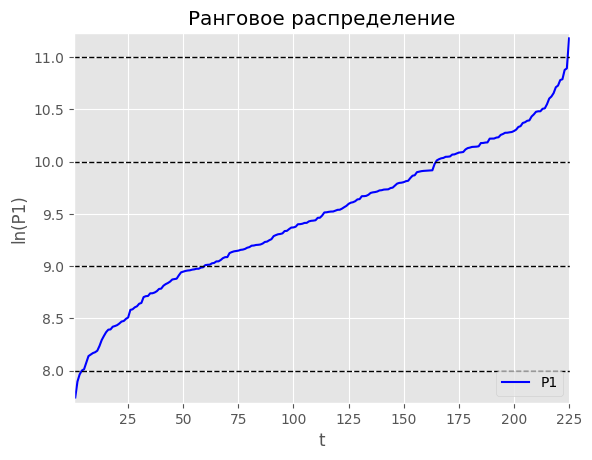

In [ ]:
t = [i for i in range(1, len(ln_p_1) + 1)]

plt.plot(t, sorted(ln_p_1), color='blue', label='P1')
for i in range(1, 20):
    plt.axhline(i, color='black', linestyle='--', lw=1)
plt.xlim(min(t) - 0.5, max(t) + 0.5)
plt.ylim(min(ln_p_1) - 0.05, max(ln_p_1) + 0.05)
plt.xlabel('t')
plt.ylabel('ln(P1)')
plt.title('Ранговое распределение')
plt.legend()

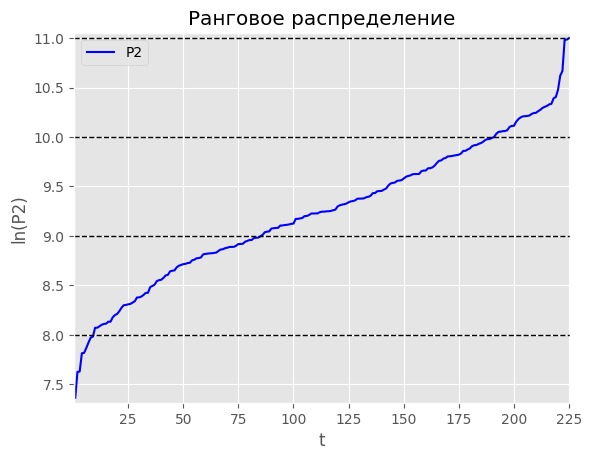

In [ ]:
t = [i for i in range(1, len(ln_p_2) + 1)]

plt.plot(t, sorted(ln_p_2), color='blue', label='P2')
for i in range(1, 20):
    plt.axhline(i, color='black', linestyle='--', lw=1)
plt.xlim(min(t) - 0.5, max(t) + 0.5)
plt.ylim(min(ln_p_2) - 0.05, max(ln_p_2) + 0.05)
plt.xlabel('t')
plt.ylabel('ln(P2)')
plt.title('Ранговое распределение')
plt.legend()

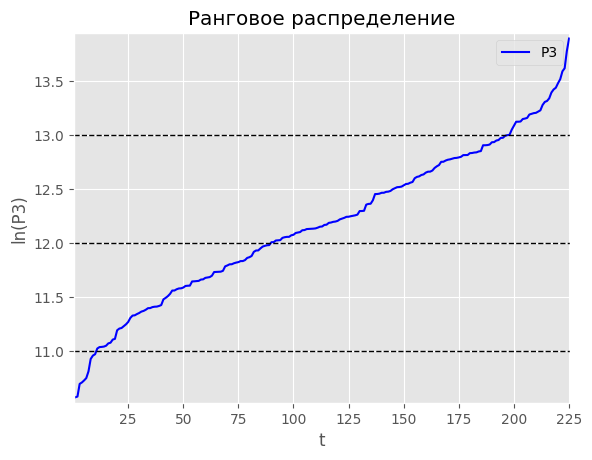

In [ ]:
t = [i for i in range(1, len(ln_p_3) + 1)]

plt.plot(t, sorted(ln_p_3), color='blue', label='P3')
for i in range(1, 20):
    plt.axhline(i, color='black', linestyle='--', lw=1)
plt.xlim(min(t) - 0.5, max(t) + 0.5)
plt.ylim(min(ln_p_3) - 0.05, max(ln_p_3) + 0.05)
plt.xlabel('t')
plt.ylabel('ln(P3)')
plt.title('Ранговое распределение')
plt.legend()

## Этап 4: Точечная диаграмма. Реализация классификатора.

### 4.1 (ln(P1), ln(P2))

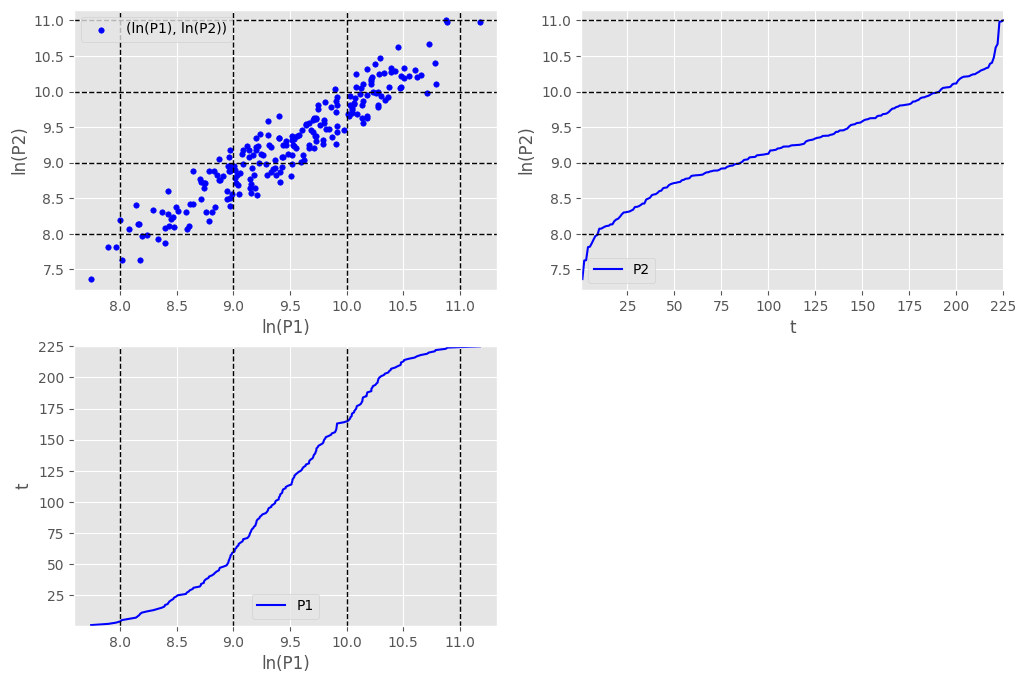

In [ ]:
fig = plt.figure(figsize=(12, 8))
gs = GridSpec(ncols=2, nrows=2, figure=fig)

ax1 = plt.subplot(gs[0, 0])
ax1.plot(np.arange(0, 5, 0.2))
ax1.scatter(ln_p_1, ln_p_2, color='blue', s=15, label='(ln(P1), ln(P2))')
for i in range(1, 20):
    ax1.axhline(i, color='black', linestyle='--', lw=1)
    ax1.axvline(i, color='black', linestyle='--', lw=1)
plt.xlim(min(ln_p_1) - 0.15, max(ln_p_1) + 0.15)
plt.ylim(min(ln_p_2) - 0.15, max(ln_p_2) + 0.15)
plt.xlabel('ln(P1)')
plt.ylabel('ln(P2)')
ax1.legend()

ax2 = fig.add_subplot(gs[0, 1])
ax2.plot([i for i in range(1, len(ln_p_2) + 1)], sorted(ln_p_2), color='blue', label='P2')
for i in range(1, 20):
    ax2.axhline(i, color='black', linestyle='--', lw=1)
plt.xlim(min(t) - 0.5, max(t) + 0.5)
plt.ylim(min(ln_p_2) - 0.15, max(ln_p_2) + 0.15)
plt.xlabel('t')
plt.ylabel('ln(P2)')
ax2.legend()

ax3 = fig.add_subplot(gs[1, 0])
ax3.plot(sorted(ln_p_1), [i for i in range(1, len(ln_p_1) + 1)], color='blue', label='P1')
for i in range(1, 20):
    ax3.axvline(i, color='black', linestyle='--', lw=1)
plt.xlim(min(ln_p_1) - 0.15, max(ln_p_1) + 0.15)
plt.ylim(min(t) - 0.5, max(t) + 0.5)
plt.xlabel('ln(P1)')
plt.ylabel('t')
ax3.legend()

### 4.2 (ln(P1), ln(P3))

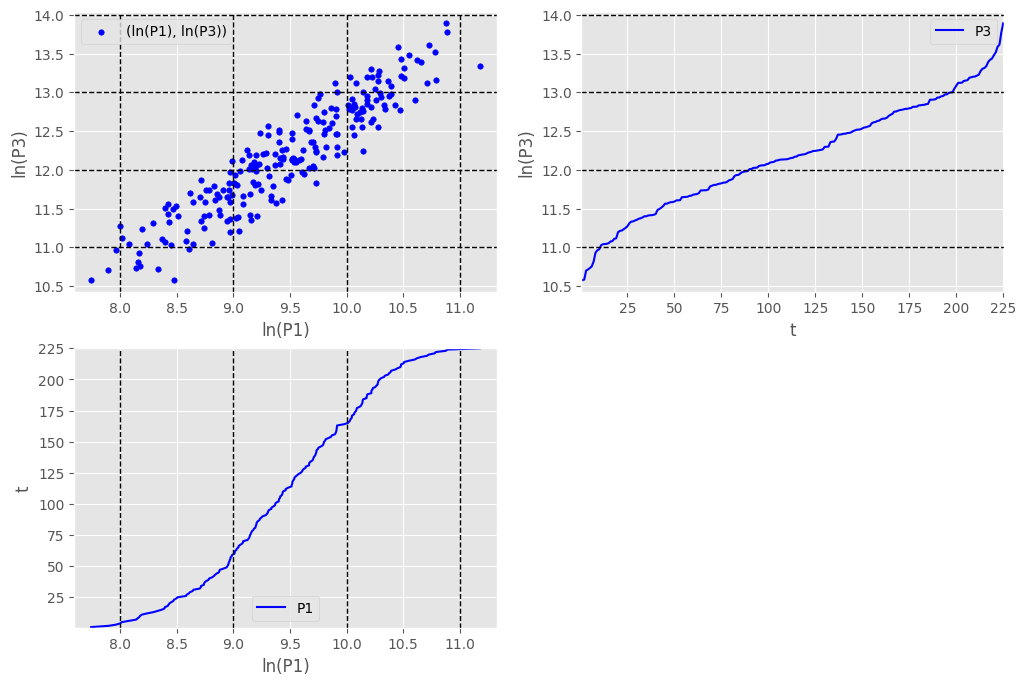

In [ ]:
fig = plt.figure(figsize=(12, 8))
gs = GridSpec(ncols=2, nrows=2, figure=fig)

ax1 = plt.subplot(gs[0, 0])
ax1.plot(np.arange(0, 5, 0.2))
ax1.scatter(ln_p_1, ln_p_3, color='blue', s=15, label='(ln(P1), ln(P3))')
for i in range(1, 20):
    ax1.axhline(i, color='black', linestyle='--', lw=1)
    ax1.axvline(i, color='black', linestyle='--', lw=1)
plt.xlim(min(ln_p_1) - 0.15, max(ln_p_1) + 0.15)
plt.ylim(min(ln_p_3) - 0.15, max(ln_p_3) + 0.15)
plt.xlabel('ln(P1)')
plt.ylabel('ln(P3)')
ax1.legend()

ax2 = fig.add_subplot(gs[0, 1])
ax2.plot([i for i in range(1, len(ln_p_3) + 1)], sorted(ln_p_3), color='blue', label='P3')
for i in range(1, 20):
    ax2.axhline(i, color='black', linestyle='--', lw=1)
plt.xlim(min(t) - 0.5, max(t) + 0.5)
plt.ylim(min(ln_p_3) - 0.15, max(ln_p_3) + 0.15)
plt.xlabel('t')
plt.ylabel('ln(P3)')
ax2.legend()

ax3 = fig.add_subplot(gs[1, 0])
ax3.plot(sorted(ln_p_1), [i for i in range(1, len(ln_p_1) + 1)], color='blue', label='P1')
for i in range(1, 20):
    ax3.axvline(i, color='black', linestyle='--', lw=1)
plt.xlim(min(ln_p_1) - 0.15, max(ln_p_1) + 0.15)
plt.ylim(min(t) - 0.5, max(t) + 0.5)
plt.xlabel('ln(P1)')
plt.ylabel('t')
ax3.legend()

### 4.3 (ln(P2), ln(P3))

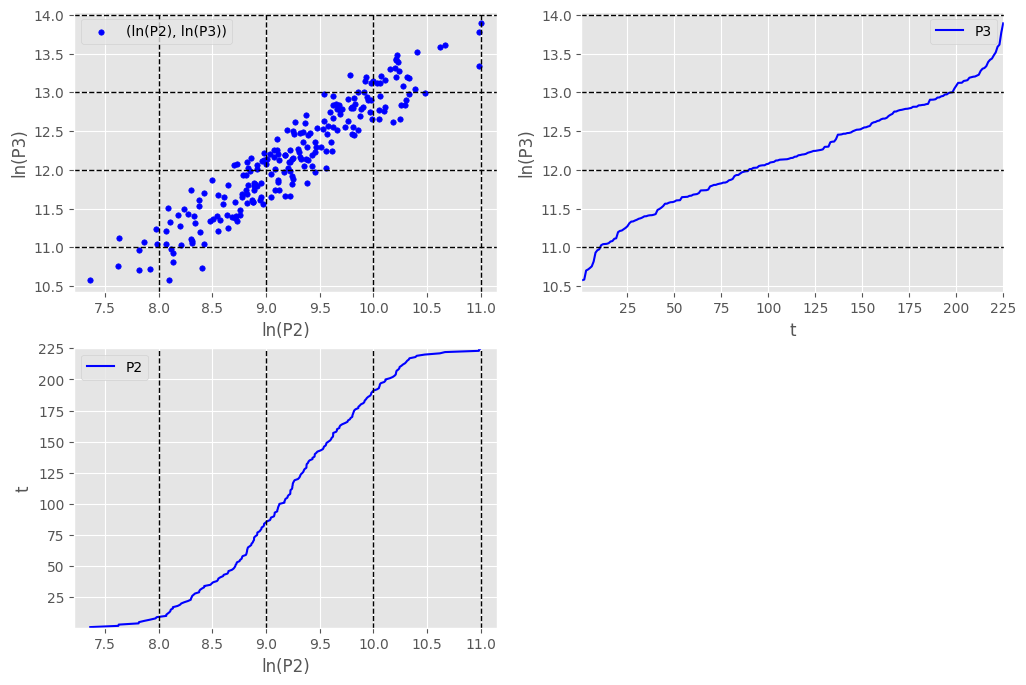

In [ ]:
fig = plt.figure(figsize=(12, 8))
gs = GridSpec(ncols=2, nrows=2, figure=fig)

ax1 = plt.subplot(gs[0, 0])
ax1.plot(np.arange(0, 5, 0.2))
ax1.scatter(ln_p_2, ln_p_3, color='blue', s=15, label='(ln(P2), ln(P3))')
for i in range(1, 20):
    ax1.axhline(i, color='black', linestyle='--', lw=1)
    ax1.axvline(i, color='black', linestyle='--', lw=1)
plt.xlim(min(ln_p_2) - 0.15, max(ln_p_2) + 0.15)
plt.ylim(min(ln_p_3) - 0.15, max(ln_p_3) + 0.15)
plt.xlabel('ln(P2)')
plt.ylabel('ln(P3)')
ax1.legend()

ax2 = fig.add_subplot(gs[0, 1])
ax2.plot([i for i in range(1, len(ln_p_3) + 1)], sorted(ln_p_3), color='blue', label='P3')
for i in range(1, 20):
    ax2.axhline(i, color='black', linestyle='--', lw=1)
plt.xlim(min(t) - 0.5, max(t) + 0.5)
plt.ylim(min(ln_p_3) - 0.15, max(ln_p_3) + 0.15)
plt.xlabel('t')
plt.ylabel('ln(P3)')
ax2.legend()

ax3 = fig.add_subplot(gs[1, 0])
ax3.plot(sorted(ln_p_2), [i for i in range(1, len(ln_p_2) + 1)], color='blue', label='P2')
for i in range(1, 20):
    ax3.axvline(i, color='black', linestyle='--', lw=1)
plt.xlim(min(ln_p_2) - 0.15, max(ln_p_2) + 0.15)
plt.ylim(min(t) - 0.5, max(t) + 0.5)
plt.xlabel('ln(P2)')
plt.ylabel('t')
ax3.legend()

## Этап 5: Критический уровень

Реперная таблица:
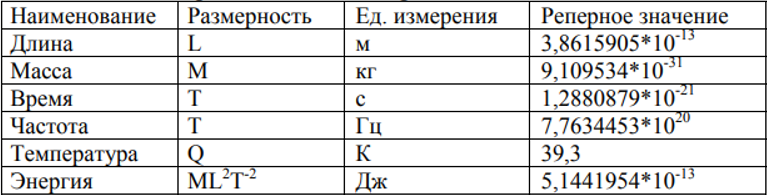

In [ ]:
'''
b - ширина
c - высота
f - макс скорость
'''
b = df['Ширина, м'] * (3.8615905 * 10 ** -13)
c = df['Высота, м'] * (3.8615905 * 10 ** -13)
f = df['Максимальная скорость, м/с'] * ((3.8615905 * 10 ** -13) / (1.2880879 * 10 ** -21)) #?

### 5.1 (b, c)

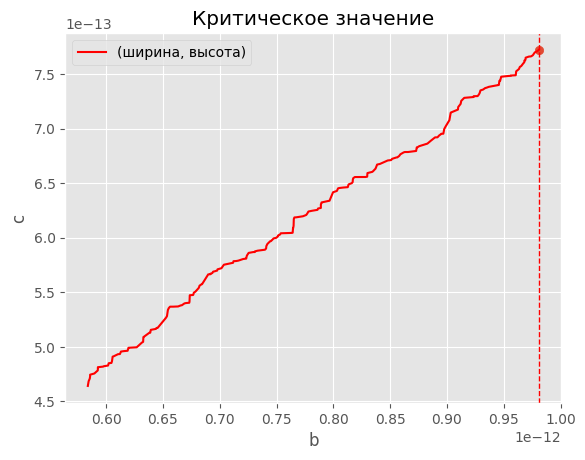

In [ ]:
plt.plot(sorted(b), sorted(c), color='red', label='(ширина, высота)')
plt.scatter(max(b), max(c))
plt.axvline(max(b), color='red', linestyle='--', lw=1)
plt.xlabel('b')
plt.ylabel('c')
plt.title('Критическое значение')
plt.legend()

### 5.2 (b, f)

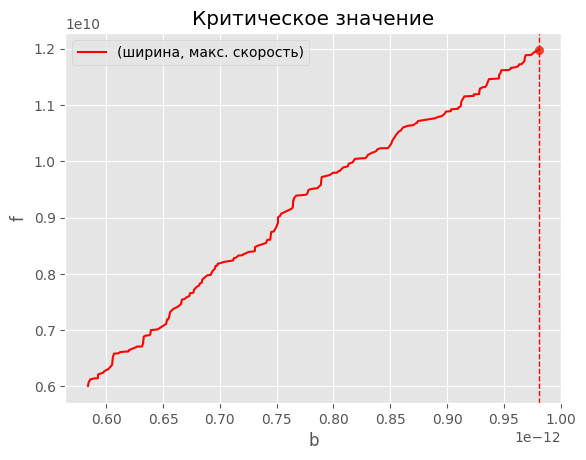

In [ ]:
plt.plot(sorted(b), sorted(f), color='red', label='(ширина, макс. скорость)')
plt.scatter(max(b), max(f))
plt.axvline(max(b), color='red', linestyle='--', lw=1)
plt.xlabel('b')
plt.ylabel('f')
plt.title('Критическое значение')
plt.legend()

### 5.3 (с, f)

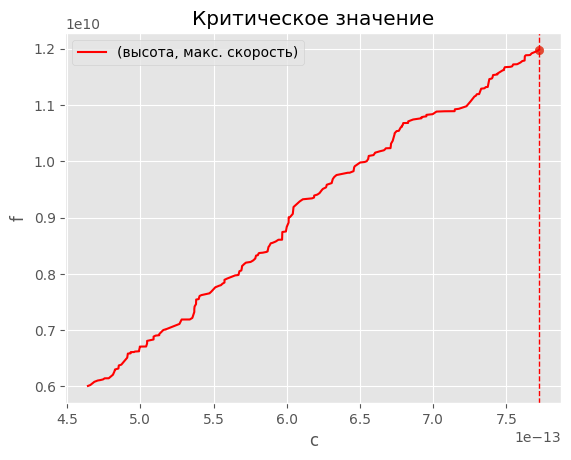

In [ ]:
plt.plot(sorted(c), sorted(f), color='red', label='(высота, макс. скорость)')
plt.scatter(max(c), max(f))
plt.axvline(max(c), color='red', linestyle='--', lw=1)
plt.xlabel('с')
plt.ylabel('f')
plt.title('Критическое значение')
plt.legend()